In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#importing all necessary tools for further analysis
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import seaborn as sns

In [12]:
#air_quality=pd.read_csv("US_AQI.csv")
air_quality=pd.read_csv("/content/US_AQI.csv")
air_quality

,Unnamed: 0,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,0,10140,2022-01-01,21,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,1,10140,2022-01-02,12,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,2,10140,2022-01-03,18,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,3,10140,2022-01-04,19,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,4,10140,2022-01-05,17,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524436,1552105,47980,2013-11-05,18,Good,PM10,1,Watertown,SD,South Dakota,44.9094,-97.1532,22249.0,474.0,America/Chicago
1524437,1552106,47980,2013-11-06,17,Good,PM10,1,Watertown,SD,South Dakota,44.9094,-97.1532,22249.0,474.0,America/Chicago
1524438,1552107,47980,2013-11-07,21,Good,PM2.5,1,Watertown,SD,South Dakota,44.9094,-97.1532,22249.0,474.0,America/Chicago
1524439,1552108,47980,2013-11-08,32,Good,PM10,1,Watertown,SD,South Dakota,44.9094,-97.1532,22249.0,474.0,America/Chicago


Cleaning Data to remove inconsistencies, irrelevancies, and missing entries to prepare it for analysis

In [13]:
air_quality_1=air_quality.copy() #Copying the dataset to make cleaning easier
air_quality_1.drop(["Unnamed: 0","CBSA Code","city_ascii", "state_name", "lat", "lng"], axis=1, inplace=True) #dropping irrelevant columns
air_quality_1 #display

,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,state_id,population,density,timezone
0,2022-01-01,21,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
1,2022-01-02,12,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
2,2022-01-03,18,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
3,2022-01-04,19,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
4,2022-01-05,17,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...
1524436,2013-11-05,18,Good,PM10,1,SD,22249.0,474.0,America/Chicago
1524437,2013-11-06,17,Good,PM10,1,SD,22249.0,474.0,America/Chicago
1524438,2013-11-07,21,Good,PM2.5,1,SD,22249.0,474.0,America/Chicago
1524439,2013-11-08,32,Good,PM10,1,SD,22249.0,474.0,America/Chicago


In [14]:
aq_2 = air_quality_1.rename(columns={'Defining Parameter': 'def par', 'Number of Sites Reporting': '# sites'}) #renmaning columns to make later on analysis easier
aq_2 #display

,Date,AQI,Category,def par,# sites,state_id,population,density,timezone
0,2022-01-01,21,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
1,2022-01-02,12,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
2,2022-01-03,18,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
3,2022-01-04,19,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
4,2022-01-05,17,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...
1524436,2013-11-05,18,Good,PM10,1,SD,22249.0,474.0,America/Chicago
1524437,2013-11-06,17,Good,PM10,1,SD,22249.0,474.0,America/Chicago
1524438,2013-11-07,21,Good,PM2.5,1,SD,22249.0,474.0,America/Chicago
1524439,2013-11-08,32,Good,PM10,1,SD,22249.0,474.0,America/Chicago


In [15]:
#Specifically dropping ireelevant air particles like PM10 from our data to exclude those rows to clean up the data
aq_2.drop(aq_2[(aq_2["def par"] == "PM10")].index, inplace= True)
aq_2.drop(aq_2[(aq_2["def par"] == "NO2")].index, inplace= True)
aq_2.drop(aq_2[(aq_2["def par"] == "CO")].index, inplace= True)
aq_2.drop(aq_2[(aq_2["def par"] == "SO2")].index, inplace= True)

In [16]:
aq_2.isna() #finding all missing data

#Replacing all the missing data with "unknown" to make future analysis easier
aq_2["Date"]=aq_2["Date"].fillna("unknown")
aq_2["AQI"]=aq_2["AQI"].fillna("unknown")
aq_2["Category"]=aq_2["Category"].fillna("unknown")
aq_2["def par"]=aq_2["def par"].fillna("unknown")
aq_2["# sites"]=aq_2["# sites"].fillna("unknown")
aq_2["state_id"]=aq_2["state_id"].fillna("unknown")
aq_2["population"]=aq_2["population"].fillna("unknown")
aq_2["density"]=aq_2["density"].fillna("unknown")
aq_2["timezone"]=aq_2["timezone"].fillna("unknown")
aq_2

,Date,AQI,Category,def par,# sites,state_id,population,density,timezone
0,2022-01-01,21,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
1,2022-01-02,12,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
2,2022-01-03,18,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
3,2022-01-04,19,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
4,2022-01-05,17,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...
1524428,2013-10-28,26,Good,PM2.5,1,SD,22249.0,474.0,America/Chicago
1524429,2013-10-29,32,Good,PM2.5,1,SD,22249.0,474.0,America/Chicago
1524430,2013-10-30,47,Good,PM2.5,1,SD,22249.0,474.0,America/Chicago
1524438,2013-11-07,21,Good,PM2.5,1,SD,22249.0,474.0,America/Chicago










Analyzing PM2.5 National and State Trends

In [17]:
aq_3=aq_2.copy() #copying the dataset
aq_3.drop(aq_3[(aq_3["def par"] == "Ozone")].index, inplace= True) #dropping all Ozone to specifically make a PM2.5 dataframe
aq_3 #display

,Date,AQI,Category,def par,# sites,state_id,population,density,timezone
0,2022-01-01,21,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
1,2022-01-02,12,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
2,2022-01-03,18,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
3,2022-01-04,19,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
4,2022-01-05,17,Good,PM2.5,2,WA,16571.0,588.0,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...
1524428,2013-10-28,26,Good,PM2.5,1,SD,22249.0,474.0,America/Chicago
1524429,2013-10-29,32,Good,PM2.5,1,SD,22249.0,474.0,America/Chicago
1524430,2013-10-30,47,Good,PM2.5,1,SD,22249.0,474.0,America/Chicago
1524438,2013-11-07,21,Good,PM2.5,1,SD,22249.0,474.0,America/Chicago


In [18]:
pm=aq_3["AQI"].value_counts() #seeing valuecounts of each air quality number
pm

,count
AQI,
52,17911
38,15328
40,15028
33,14938
35,14777
...,...
430,1
463,1
370,1


In [19]:
avg_pm=aq_3["AQI"].mean() #calulating the national mean of air quality for PM2.5
print(avg_pm)

40.84102841441056


In [20]:
std_pm= aq_3["AQI"].std() #calulating the national mean of air quality for Ozone
print(std_pm)

22.78539268860959


In [21]:
high=aq_3.sort_values(by="AQI", ascending=False) #put the dataset in descending order to see the highest Air Quality Indexes
high

,Date,AQI,Category,def par,# sites,state_id,population,density,timezone
322557,2020-09-11,641,Hazardous,PM2.5,2,OR,263571.0,1359.0,America/Los_Angeles
795144,2017-09-06,593,Hazardous,PM2.5,3,MT,93723.0,839.0,America/Denver
206023,2020-09-11,583,Hazardous,PM2.5,2,OR,107460.0,1114.0,America/Los_Angeles
312678,2020-09-12,561,Hazardous,PM2.5,1,OR,10429.0,313.0,America/Los_Angeles
240657,2020-09-12,550,Hazardous,PM2.5,7,OR,270013.0,1489.0,America/Los_Angeles
...,...,...,...,...,...,...,...,...,...
272487,2020-01-26,0,Good,PM2.5,1,NH,16584.0,322.0,America/New_York
474164,2019-04-19,0,Good,PM2.5,1,SD,13908.0,412.0,America/Chicago
272481,2020-01-20,0,Good,PM2.5,1,NH,16584.0,322.0,America/New_York
272477,2020-01-16,0,Good,PM2.5,1,NH,16584.0,322.0,America/New_York


In [22]:
high_10=high.iloc[:10] #locating the 10 highest and displaying
high_10

,Date,AQI,Category,def par,# sites,state_id,population,density,timezone
322557,2020-09-11,641,Hazardous,PM2.5,2,OR,263571.0,1359.0,America/Los_Angeles
795144,2017-09-06,593,Hazardous,PM2.5,3,MT,93723.0,839.0,America/Denver
206023,2020-09-11,583,Hazardous,PM2.5,2,OR,107460.0,1114.0,America/Los_Angeles
312678,2020-09-12,561,Hazardous,PM2.5,1,OR,10429.0,313.0,America/Los_Angeles
240657,2020-09-12,550,Hazardous,PM2.5,7,OR,270013.0,1489.0,America/Los_Angeles
322555,2020-09-09,550,Hazardous,PM2.5,3,OR,263571.0,1359.0,America/Los_Angeles
322559,2020-09-13,548,Hazardous,PM2.5,2,OR,263571.0,1359.0,America/Los_Angeles
183464,2021-09-14,537,Hazardous,PM2.5,3,CA,235184.0,1354.0,America/Los_Angeles
809023,2017-12-06,537,Hazardous,PM2.5,5,CA,378990.0,3023.0,America/Los_Angeles
335333,2020-09-13,536,Hazardous,PM2.5,6,WA,426849.0,1230.0,America/Los_Angeles


In [23]:
high_10_values_1=high_10["state_id"].value_counts() #showing value counts for the states with the highest indexes
high_10_values_1

,count
state_id,
OR,6
CA,2
MT,1
WA,1


In [24]:
low=aq_3.sort_values(by="AQI", ascending=True) #putting in ascending order to see the lowest AQI
low

,Date,AQI,Category,def par,# sites,state_id,population,density,timezone
205074,2020-01-31,0,Good,PM2.5,2,WA,129653.0,1246.0,America/Los_Angeles
459346,2019-04-28,0,Good,PM2.5,1,ID,25652.0,1433.0,America/Los_Angeles
459347,2019-04-29,0,Good,PM2.5,1,ID,25652.0,1433.0,America/Los_Angeles
439330,2019-11-28,0,Good,PM2.5,1,NH,16584.0,322.0,America/New_York
439325,2019-11-23,0,Good,PM2.5,1,NH,16584.0,322.0,America/New_York
...,...,...,...,...,...,...,...,...,...
322555,2020-09-09,550,Hazardous,PM2.5,3,OR,263571.0,1359.0,America/Los_Angeles
312678,2020-09-12,561,Hazardous,PM2.5,1,OR,10429.0,313.0,America/Los_Angeles
206023,2020-09-11,583,Hazardous,PM2.5,2,OR,107460.0,1114.0,America/Los_Angeles
795144,2017-09-06,593,Hazardous,PM2.5,3,MT,93723.0,839.0,America/Denver


In [25]:
low_10=low.iloc[:10] #locating the 10 lowest and displaying
low_10

,Date,AQI,Category,def par,# sites,state_id,population,density,timezone
205074,2020-01-31,0,Good,PM2.5,2,WA,129653.0,1246.0,America/Los_Angeles
459346,2019-04-28,0,Good,PM2.5,1,ID,25652.0,1433.0,America/Los_Angeles
459347,2019-04-29,0,Good,PM2.5,1,ID,25652.0,1433.0,America/Los_Angeles
439330,2019-11-28,0,Good,PM2.5,1,NH,16584.0,322.0,America/New_York
439325,2019-11-23,0,Good,PM2.5,1,NH,16584.0,322.0,America/New_York
439322,2019-11-20,0,Good,PM2.5,1,NH,16584.0,322.0,America/New_York
439315,2019-11-13,0,Good,PM2.5,1,NH,16584.0,322.0,America/New_York
439314,2019-11-12,0,Good,PM2.5,1,NH,16584.0,322.0,America/New_York
439303,2019-11-01,0,Good,PM2.5,1,NH,16584.0,322.0,America/New_York
439302,2019-10-31,0,Good,PM2.5,1,NH,16584.0,322.0,America/New_York


In [26]:
low_10_1=low_10["state_id"].value_counts() #showing value counts for the states with the lowest indexes
low_10_1

,count
state_id,
NH,7
ID,2
WA,1


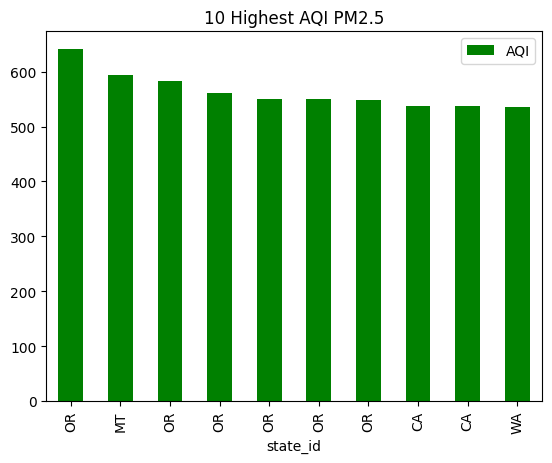

In [27]:
high_g=high_10.plot(kind="bar",color="green", x="state_id", y="AQI", title="10 Highest AQI PM2.5")
plt.show()

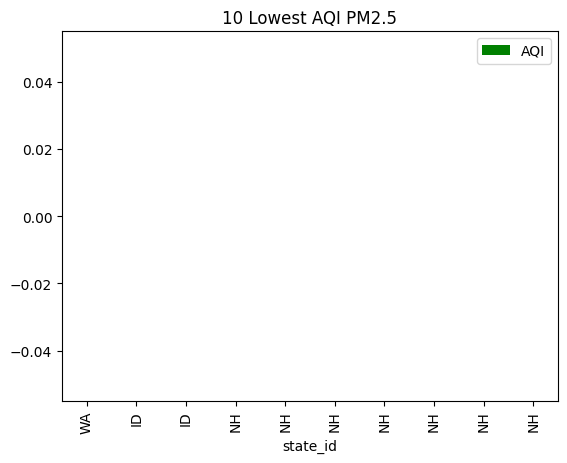

In [28]:
low_g=low_10.plot(kind="bar",color="green", x="state_id", y="AQI", title="10 Lowest AQI PM2.5")
plt.show()

In [29]:
aq_4=aq_2.copy()
aq_4.drop(aq_4[(aq_4["def par"] == "PM2.5")].index, inplace= True)
aq_4

,Date,AQI,Category,def par,# sites,state_id,population,density,timezone
90,2022-03-01,37,Good,Ozone,3,OH,570375.0,1230.0,America/New_York
92,2022-03-03,39,Good,Ozone,5,OH,570375.0,1230.0,America/New_York
93,2022-03-04,39,Good,Ozone,3,OH,570375.0,1230.0,America/New_York
94,2022-03-05,54,Moderate,Ozone,3,OH,570375.0,1230.0,America/New_York
95,2022-03-06,44,Good,Ozone,5,OH,570375.0,1230.0,America/New_York
...,...,...,...,...,...,...,...,...,...
1524055,2013-10-16,16,Good,Ozone,2,IA,115266.0,424.0,America/Chicago
1524056,2013-10-17,35,Good,Ozone,2,IA,115266.0,424.0,America/Chicago
1524057,2013-10-18,26,Good,Ozone,2,IA,115266.0,424.0,America/Chicago
1524058,2013-10-19,22,Good,Ozone,2,IA,115266.0,424.0,America/Chicago


In [30]:
avg_oz= aq_4["AQI"].mean()
print(avg_oz)

43.34107334825937


In [31]:
std_oz= aq_4["AQI"].std()
print(std_oz)

18.60154944268001


In [32]:
highest=aq_4.sort_values(by="AQI", ascending=False)
highest

,Date,AQI,Category,def par,# sites,state_id,population,density,timezone
285393,2020-08-24,396,Hazardous,Ozone,1,PR,93426.0,1101.0,America/Puerto_Rico
307241,2020-08-19,282,Very Unhealthy,Ozone,44,AZ,4187723.0,1236.0,America/Phoenix
307095,2020-03-26,274,Very Unhealthy,Ozone,44,AZ,4187723.0,1236.0,America/Phoenix
307246,2020-08-24,272,Very Unhealthy,Ozone,44,AZ,4187723.0,1236.0,America/Phoenix
307247,2020-08-25,262,Very Unhealthy,Ozone,44,AZ,4187723.0,1236.0,America/Phoenix
...,...,...,...,...,...,...,...,...,...
325238,2020-01-08,1,Good,Ozone,1,PR,1854549.0,2982.0,America/Puerto_Rico
660522,2018-01-22,1,Good,Ozone,1,PR,1854549.0,2982.0,America/Puerto_Rico
1402166,2013-08-18,0,Good,Ozone,1,AL,26578.0,540.0,America/Chicago
997856,2016-09-22,0,Good,Ozone,1,PR,1854549.0,2982.0,America/Puerto_Rico


In [33]:
highest_10=highest.iloc[:10]
highest_10

,Date,AQI,Category,def par,# sites,state_id,population,density,timezone
285393,2020-08-24,396,Hazardous,Ozone,1,PR,93426.0,1101.0,America/Puerto_Rico
307241,2020-08-19,282,Very Unhealthy,Ozone,44,AZ,4187723.0,1236.0,America/Phoenix
307095,2020-03-26,274,Very Unhealthy,Ozone,44,AZ,4187723.0,1236.0,America/Phoenix
307246,2020-08-24,272,Very Unhealthy,Ozone,44,AZ,4187723.0,1236.0,America/Phoenix
307247,2020-08-25,262,Very Unhealthy,Ozone,44,AZ,4187723.0,1236.0,America/Phoenix
285375,2020-08-04,248,Very Unhealthy,Ozone,1,PR,93426.0,1101.0,America/Puerto_Rico
307248,2020-08-26,247,Very Unhealthy,Ozone,44,AZ,4187723.0,1236.0,America/Phoenix
307128,2020-04-28,240,Very Unhealthy,Ozone,44,AZ,4187723.0,1236.0,America/Phoenix
140433,2021-09-14,239,Very Unhealthy,Ozone,42,AZ,4187723.0,1236.0,America/Phoenix
307250,2020-08-28,239,Very Unhealthy,Ozone,44,AZ,4187723.0,1236.0,America/Phoenix


In [34]:
lowest=aq_4.sort_values(by="AQI", ascending=True)
lowest

,Date,AQI,Category,def par,# sites,state_id,population,density,timezone
997856,2016-09-22,0,Good,Ozone,1,PR,1854549.0,2982.0,America/Puerto_Rico
1402166,2013-08-18,0,Good,Ozone,1,AL,26578.0,540.0,America/Chicago
349215,2020-09-09,0,Good,Ozone,1,NJ,92364.0,335.0,America/New_York
660518,2018-01-18,1,Good,Ozone,1,PR,1854549.0,2982.0,America/Puerto_Rico
1402167,2013-08-19,1,Good,Ozone,1,AL,26578.0,540.0,America/Chicago
...,...,...,...,...,...,...,...,...,...
307247,2020-08-25,262,Very Unhealthy,Ozone,44,AZ,4187723.0,1236.0,America/Phoenix
307246,2020-08-24,272,Very Unhealthy,Ozone,44,AZ,4187723.0,1236.0,America/Phoenix
307095,2020-03-26,274,Very Unhealthy,Ozone,44,AZ,4187723.0,1236.0,America/Phoenix
307241,2020-08-19,282,Very Unhealthy,Ozone,44,AZ,4187723.0,1236.0,America/Phoenix


In [35]:
lowest_10=lowest.iloc[:10]
lowest_10

,Date,AQI,Category,def par,# sites,state_id,population,density,timezone
997856,2016-09-22,0,Good,Ozone,1,PR,1854549.0,2982.0,America/Puerto_Rico
1402166,2013-08-18,0,Good,Ozone,1,AL,26578.0,540.0,America/Chicago
349215,2020-09-09,0,Good,Ozone,1,NJ,92364.0,335.0,America/New_York
660518,2018-01-18,1,Good,Ozone,1,PR,1854549.0,2982.0,America/Puerto_Rico
1402167,2013-08-19,1,Good,Ozone,1,AL,26578.0,540.0,America/Chicago
463807,2019-11-19,1,Good,Ozone,1,PA,21805.0,1013.0,America/New_York
660516,2018-01-16,1,Good,Ozone,1,PR,1854549.0,2982.0,America/Puerto_Rico
1402164,2013-08-16,1,Good,Ozone,1,AL,26578.0,540.0,America/Chicago
660505,2018-01-05,1,Good,Ozone,1,PR,1854549.0,2982.0,America/Puerto_Rico
988668,2016-10-01,1,Good,Ozone,1,MN,16366.0,181.0,America/Chicago


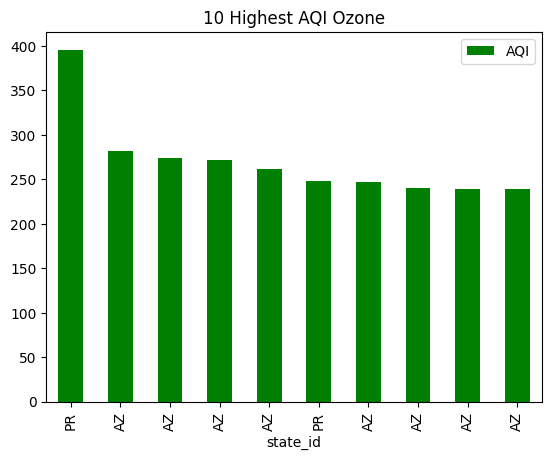

In [36]:
highest_g=highest_10.plot(kind="bar",color="green", x="state_id", y="AQI", title="10 Highest AQI Ozone")
plt.show()

In [37]:
highest_10_1=highest_10["state_id"].value_counts() #showing value counts for the states with the lowest indexes
highest_10_1

,count
state_id,
AZ,8
PR,2


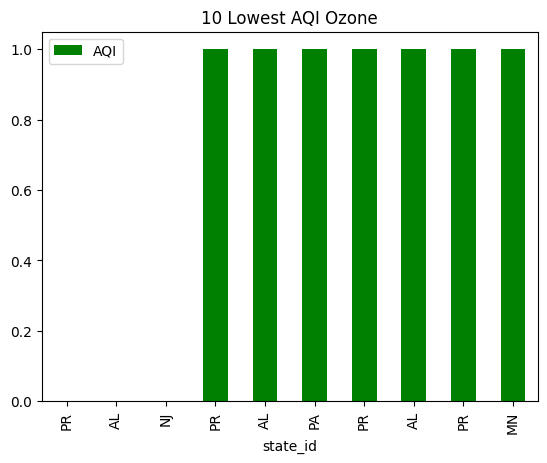

In [38]:
lowest_g=lowest_10.plot(kind="bar",color="green", x="state_id", y="AQI", title="10 Lowest AQI Ozone")
plt.show()

In [39]:
lowest_10_1=lowest_10["state_id"].value_counts() #showing value counts for the states with the lowest indexes
lowest_10_1

,count
state_id,
PR,4
AL,3
NJ,1
PA,1
MN,1


Analysis of Temporal Trends

Generate state-wise heatmaps of PM2.5 and Ozone levels.

<ipython-input-40-851cd236fbdd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ozone_data, x='state_id', y='AQI', order=state_order, palette='coolwarm')


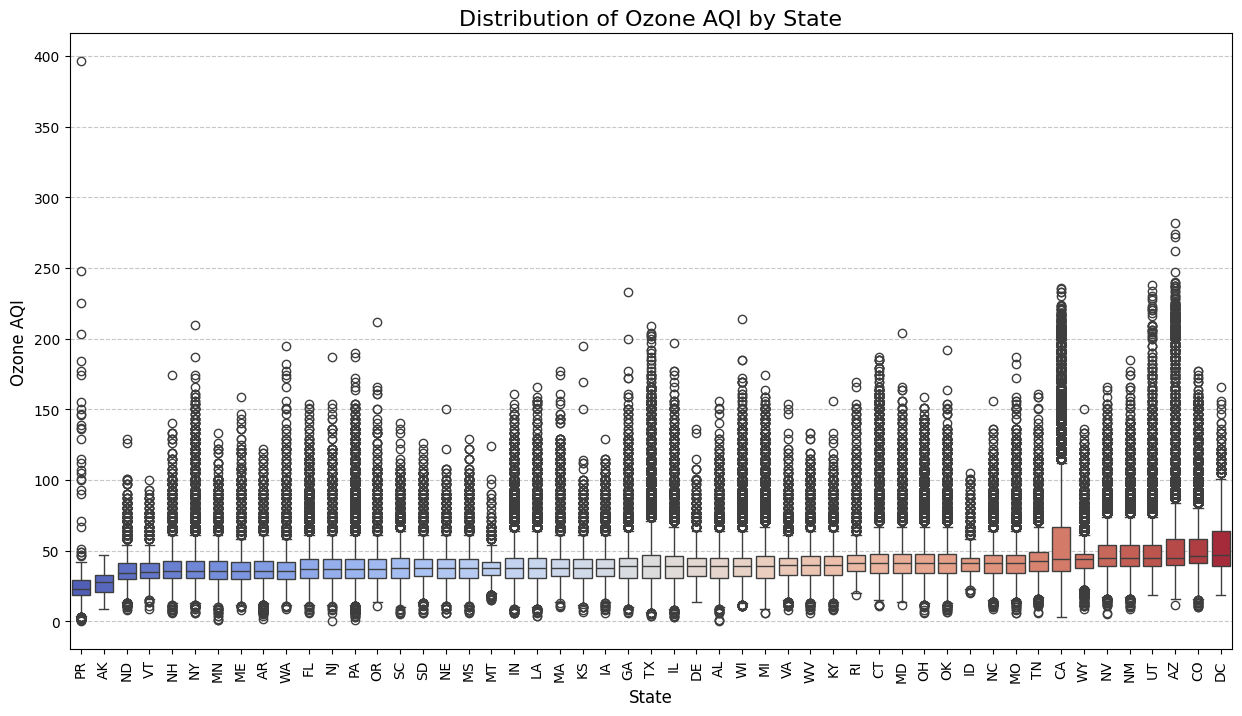

In [40]:
ozone_data = aq_2[aq_2['def par'] == 'Ozone']

state_order = ozone_data.groupby('state_id')['AQI'].median().sort_values(ascending=True).index

plt.figure(figsize=(15, 8))
sns.boxplot(data=ozone_data, x='state_id', y='AQI', order=state_order, palette='coolwarm')

plt.title('Distribution of Ozone AQI by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Ozone AQI', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<ipython-input-41-4b7bf3644783>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ozone_data[ozone_data['state_id'].isin(top_states_ozone)], x='state_id', y='AQI', palette='Reds')


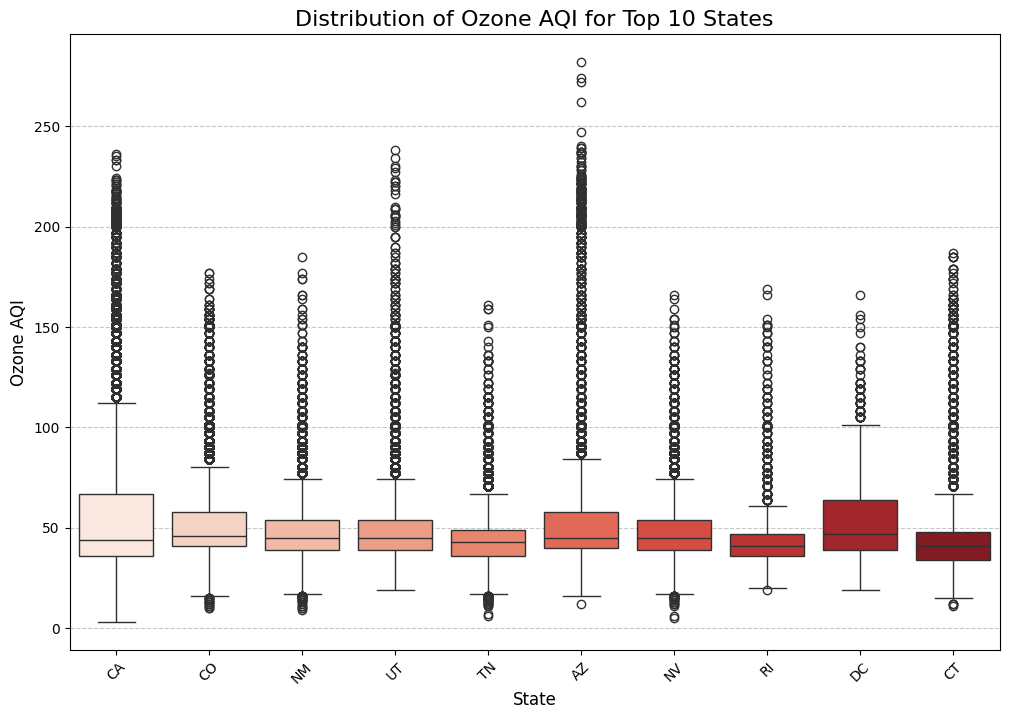

In [41]:
# The Top 10 states with highest average ozone AQI
top_states_ozone = ozone_data.groupby('state_id')['AQI'].mean().sort_values(ascending=False).head(10).index

plt.figure(figsize=(12, 8))
sns.boxplot(data=ozone_data[ozone_data['state_id'].isin(top_states_ozone)], x='state_id', y='AQI', palette='Reds')

plt.title('Distribution of Ozone AQI for Top 10 States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Ozone AQI', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('distribution_ozone_AQI_top_10')

plt.show()

<ipython-input-42-ad1e29533d5f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ozone_data[ozone_data['state_id'].isin(bottom_states_ozone)], x='state_id', y='AQI', palette='Blues')


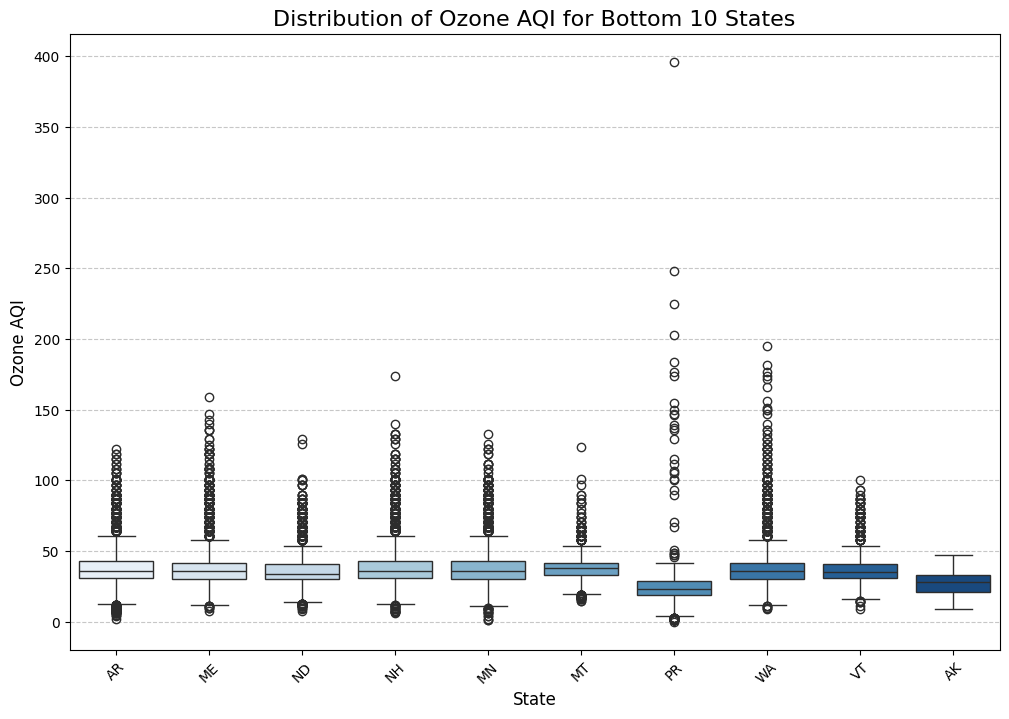

In [42]:
# The bottom 10 states with lowest average ozone AQI
bottom_states_ozone = ozone_data.groupby('state_id')['AQI'].mean().sort_values().head(10).index

plt.figure(figsize=(12, 8))
sns.boxplot(data=ozone_data[ozone_data['state_id'].isin(bottom_states_ozone)], x='state_id', y='AQI', palette='Blues')

plt.title('Distribution of Ozone AQI for Bottom 10 States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Ozone AQI', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-43-483ec73e0f16>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pm_data, x='state_id', y='AQI', order=state_order, palette='coolwarm')


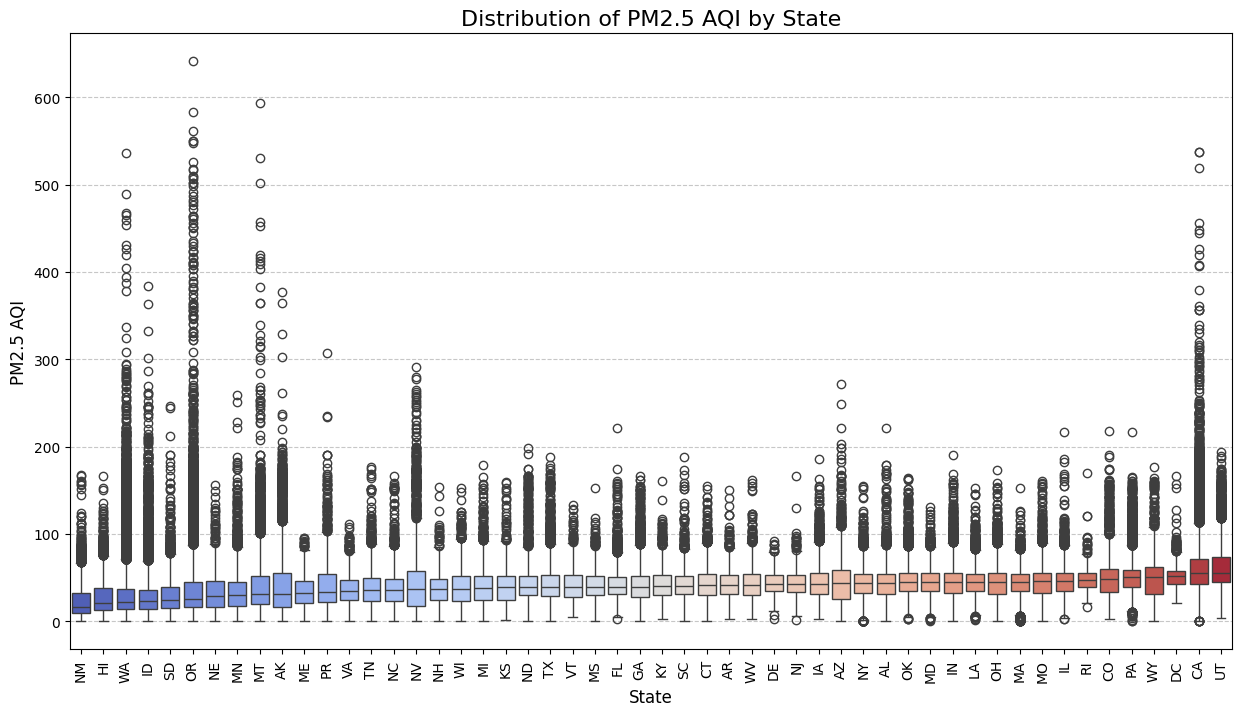

In [43]:
pm_data = aq_2[aq_2['def par'] == 'PM2.5']

state_order = pm_data.groupby('state_id')['AQI'].median().sort_values(ascending=True).index

plt.figure(figsize=(15, 8))
sns.boxplot(data=pm_data, x='state_id', y='AQI', order=state_order, palette='coolwarm')

plt.title('Distribution of PM2.5 AQI by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('PM2.5 AQI', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-44-8633e618b0f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pm_data[pm_data['state_id'].isin(top_states_pm)], x='state_id', y='AQI', palette='Reds')


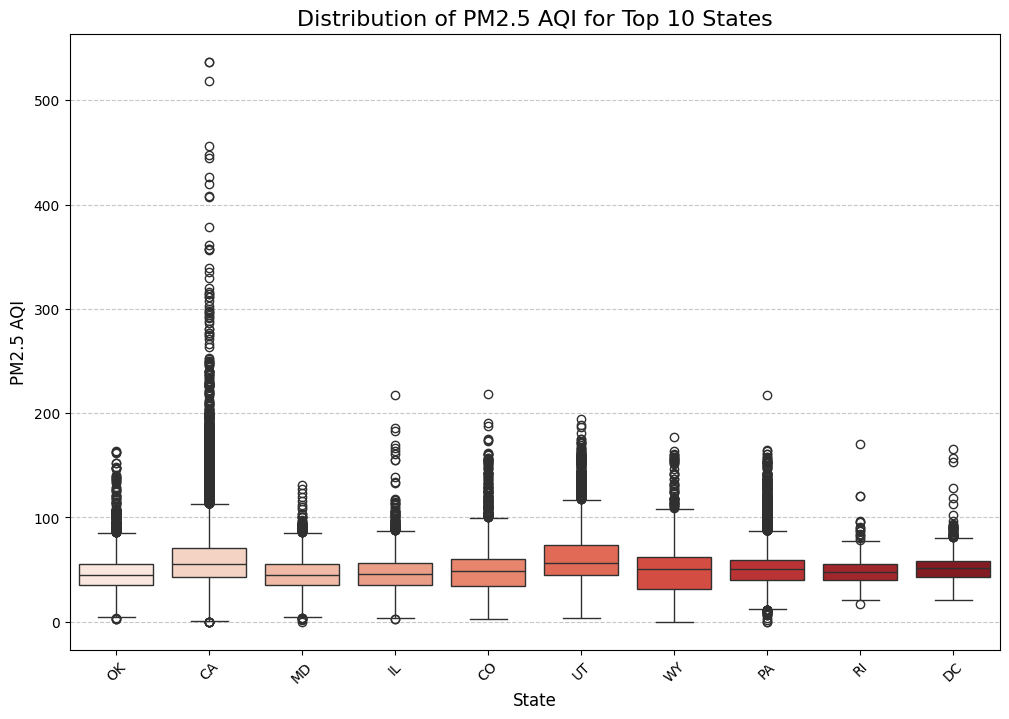

In [44]:
# The Top 10 states with highest average PM2.5 AQI
top_states_pm = pm_data.groupby('state_id')['AQI'].mean().sort_values(ascending=False).head(10).index

plt.figure(figsize=(12, 8))
sns.boxplot(data=pm_data[pm_data['state_id'].isin(top_states_pm)], x='state_id', y='AQI', palette='Reds')

plt.title('Distribution of PM2.5 AQI for Top 10 States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('PM2.5 AQI', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-45-cb6a4cdc6594>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pm_data[pm_data['state_id'].isin(bottom_states_pm)], x='state_id', y='AQI', palette='Blues')


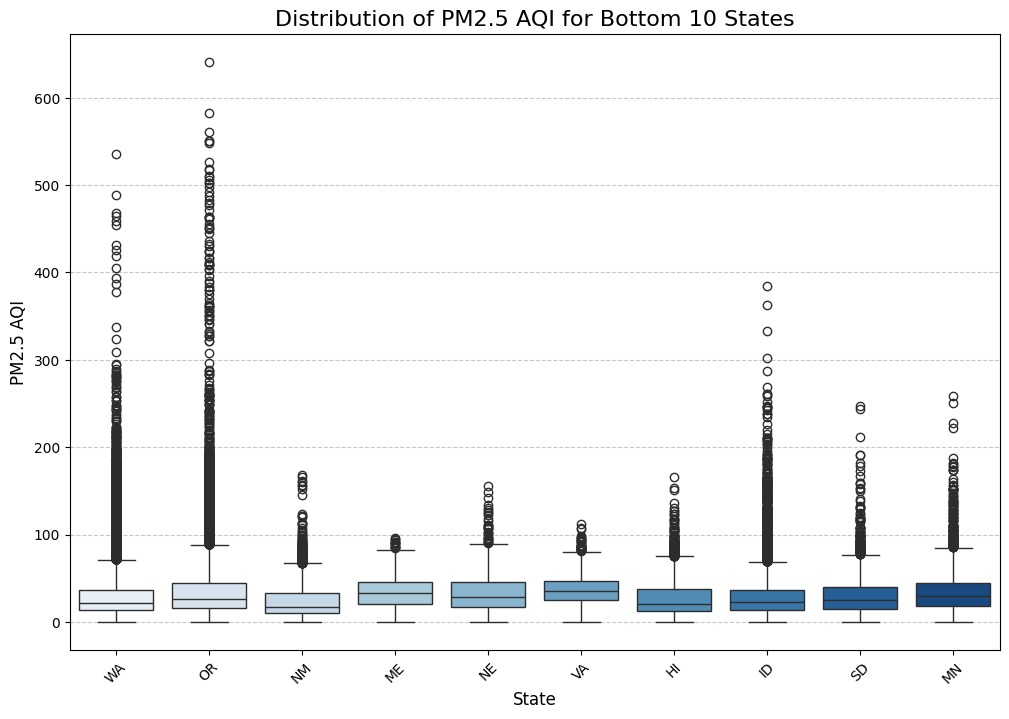

In [45]:
# The bottom 10 states with lowest average PM2.5 AQI
bottom_states_pm = pm_data.groupby('state_id')['AQI'].mean().sort_values().head(10).index

plt.figure(figsize=(12, 8))
sns.boxplot(data=pm_data[pm_data['state_id'].isin(bottom_states_pm)], x='state_id', y='AQI', palette='Blues')

plt.title('Distribution of PM2.5 AQI for Bottom 10 States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('PM2.5 AQI', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-46-dbf55c0103cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm2_data['Date'] = pd.to_datetime(pm2_data['Date'])
<ipython-input-46-dbf55c0103cd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm2_data['Year'] = pm2_data['Date'].dt.year


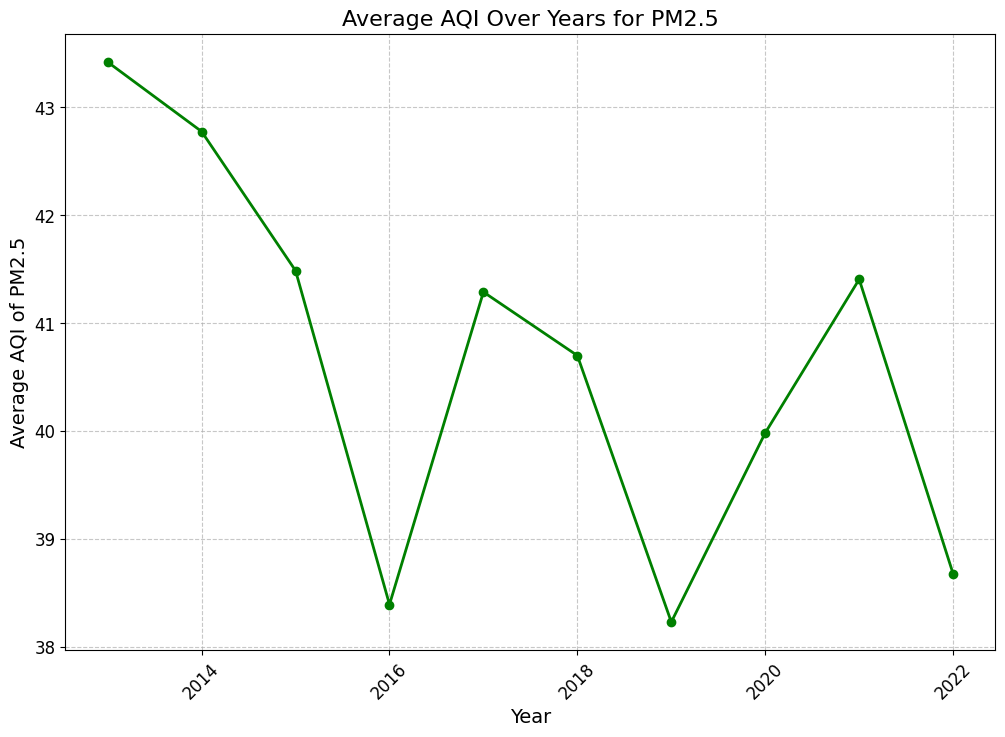

In [46]:
# Analyze Average AQI for PM2.5 Over the Years in the USA
pm2_data = aq_2[aq_2['def par'] == 'PM2.5']

pm2_data['Date'] = pd.to_datetime(pm2_data['Date'])
pm2_data['Year'] = pm2_data['Date'].dt.year

average_aqi_by_year_pm25 = pm2_data.groupby('Year')['AQI'].mean()

plt.figure(figsize=(12, 8))
average_aqi_by_year_pm25.plot(kind='line', marker='o', color='green', linewidth=2)

plt.title('Average AQI Over Years for PM2.5', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average AQI of PM2.5', fontsize=14)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()



<ipython-input-47-5e3f5176c69d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ozone2_data['Date'] = pd.to_datetime(ozone2_data['Date'])
<ipython-input-47-5e3f5176c69d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ozone2_data['Year'] = ozone2_data['Date'].dt.year


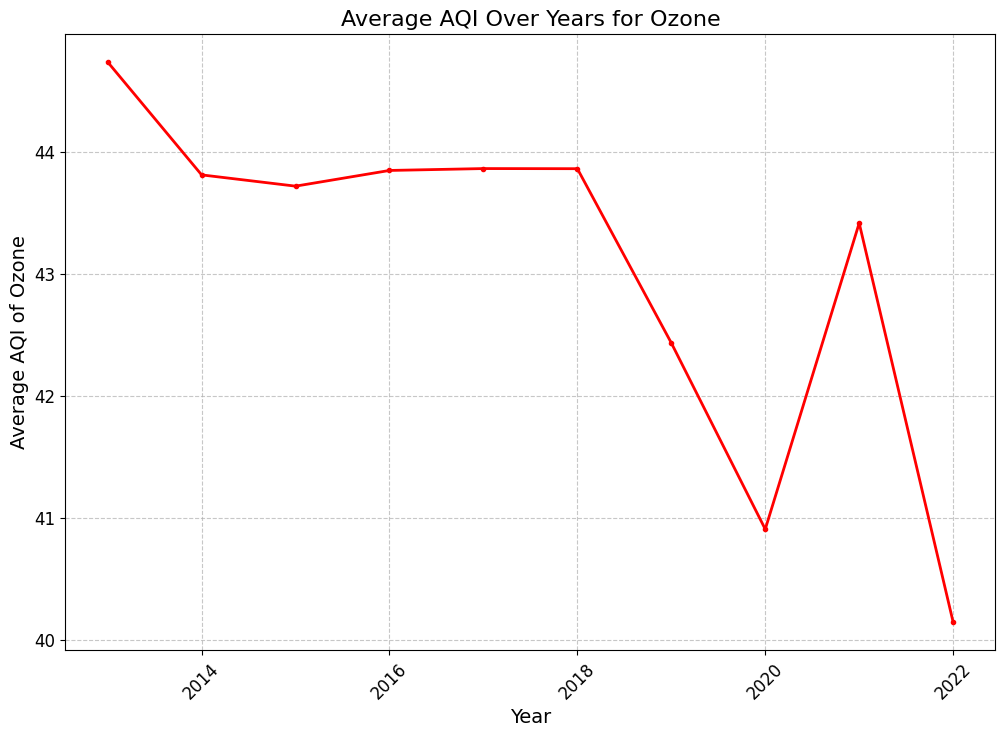

In [47]:
# Analyze Average AQI for Ozone Over the Years in the USA
ozone2_data = aq_2[aq_2['def par'] == 'Ozone']

ozone2_data['Date'] = pd.to_datetime(ozone2_data['Date'])
ozone2_data['Year'] = ozone2_data['Date'].dt.year

average_aqi_by_year_ozone = ozone2_data.groupby('Year')['AQI'].mean()

plt.figure(figsize=(12, 8))
average_aqi_by_year_ozone.plot(kind='line', marker='.', color='red', linewidth=2)

plt.title('Average AQI Over Years for Ozone', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average AQI of Ozone', fontsize=14)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

<Figure size 3000x4000 with 0 Axes>

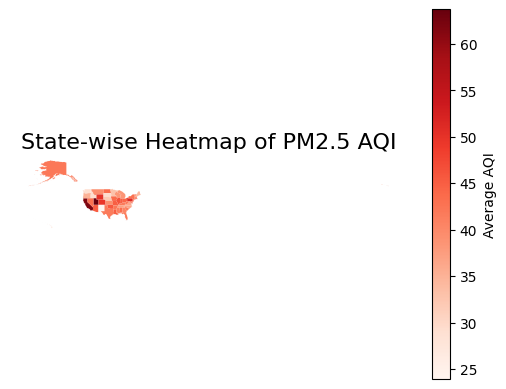

<Figure size 3000x4000 with 0 Axes>

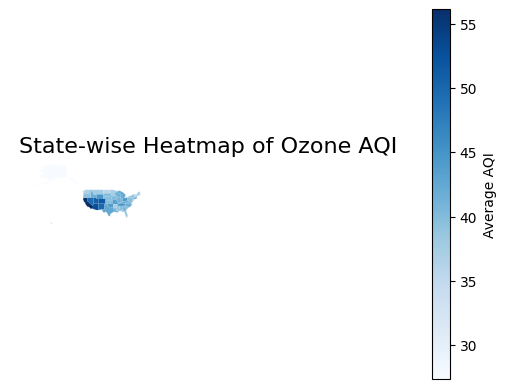

In [49]:
# Data Cleaning
air_quality = air_quality[air_quality["Defining Parameter"].isin(["PM2.5", "Ozone"])]
air_quality["AQI"] = pd.to_numeric(air_quality["AQI"], errors="coerce")

# Load US states shapefile from Natural Earth (downloaded manually)
shapefile_path = '/content/ne_10m_admin_1_states_provinces.zip'
gdf_states = gpd.read_file(shapefile_path)


# Filter for US states only
gdf_states = gdf_states[gdf_states['admin'] == 'United States of America']
gdf_states = gdf_states.rename(columns={'name': 'state_name'})

# Map state names in shapefile to abbreviations in the data
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
gdf_states['state_id'] = gdf_states['state_name'].map(state_abbreviations)

# Aggregate AQI data by state and parameter
def aggregate_aqi(data, parameter):
    return data[data["Defining Parameter"] == parameter].groupby("state_id")["AQI"].mean()

pm25_aqi = aggregate_aqi(air_quality, "PM2.5")
ozone_aqi = aggregate_aqi(air_quality, "Ozone")

# Merge AQI data with GeoDataFrame
gdf_pm25 = gdf_states.merge(pm25_aqi, on='state_id', how='left')
gdf_ozone = gdf_states.merge(ozone_aqi, on='state_id', how='left')

# Plot heatmap function
def plot_us_heatmap(gdf, column, title, cmap):
    plt.figure(figsize=(30, 40))
    gdf.plot(
        column=column,
        cmap=cmap,
        legend=True,
        legend_kwds={'label': f"Average {column}", 'orientation': "vertical"},
        missing_kwds={"color": "lightgrey", "label": "No Data"}
    )
    plt.title(title, fontsize=16)
    plt.axis("off")
    plt.show()

# Plot PM2.5 heatmap
plot_us_heatmap(gdf_pm25, "AQI", "State-wise Heatmap of PM2.5 AQI", "Reds")

# Plot Ozone heatmap
plot_us_heatmap(gdf_ozone, "AQI", "State-wise Heatmap of Ozone AQI", "Blues")

